In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print(train_images.shape)  # (60000, 28, 28)
print(len(train_labels))  # 60000
print(train_labels)  # [9 0 0 ... 3 0 5]
print(test_images.shape)  # (10000, 28, 28)
print(len(test_labels))  # 10000

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

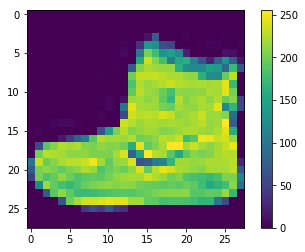

In [7]:
# 数据预处理

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

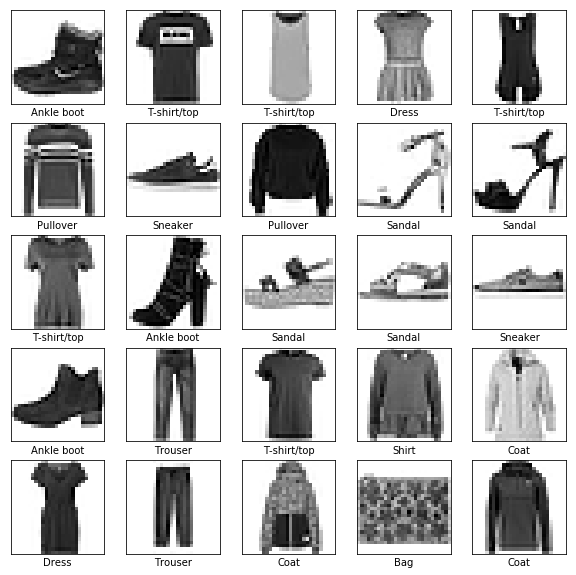

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 下面展示训练集中前25个图片及其对应的标签
plt.figure(figsize=(10,10)) # plt.figure定义一个图像窗口，大小为(10,10)

for i in range(25):
    plt.subplot(5,5,i+1) # 5行5列
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# 建立模型
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 训练模型
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4953 - accuracy: 0.8260s - loss: 0.508
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3720 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3333 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3106 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2905 - accuracy: 0.8930
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2784 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2665 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2555 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2466 - accuracy: 0.9078

In [13]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)  # Test accuracy:  0.8821

predictions = model.predict(test_images)
print(predictions[0])
pred_label0 = np.argmax(predictions[0])
print("pred_label0: ", pred_label0)
true_label0 = test_labels[0]
print("true_label0: ", true_label0)
print(true_label0 == pred_label0)

10000/1 - 0s - loss: 0.2198 - accuracy: 0.8869

Test accuracy:  0.8869
[8.0098523e-08 6.5326358e-09 3.9833589e-07 6.1381866e-10 1.9171794e-06
 6.4366378e-02 7.6148763e-06 4.2921521e-02 7.2653307e-07 8.9270133e-01]
pred_label0:  9
true_label0:  9
True


In [14]:
# 来看一下10个类别各自预测的结果
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

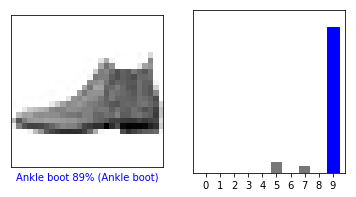

In [15]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

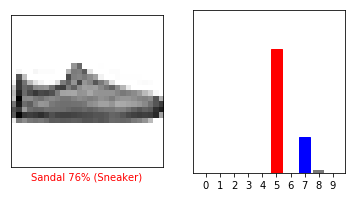

In [16]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

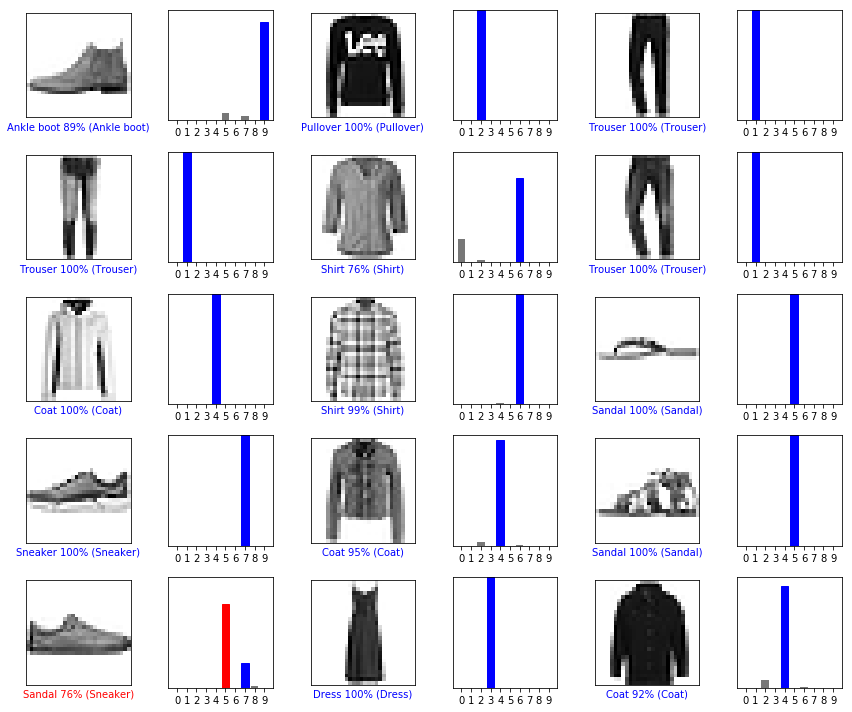

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [18]:
# 最后，我们使用训练好的模型对单个图片进行预测
img = test_images[1]
print(img.shape)

(28, 28)


In [19]:
# 因为tf.keras的模型只能针对一个batch,集合做预测，所以要把单个图片转换为一个list
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [20]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.4453576e-06 9.6650118e-15 9.9887866e-01 1.3702993e-14 1.0471363e-03
  1.6662408e-15 6.8696383e-05 3.8252254e-22 3.7892267e-12 2.9887441e-20]]


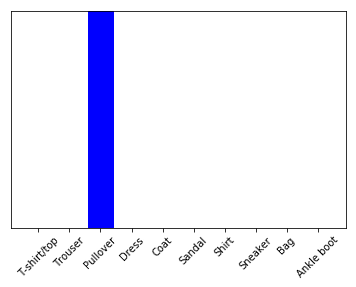

In [21]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [22]:
np.argmax(predictions_single[0])

2